In [1]:
X <- read.csv("./data/X.csv", header = TRUE)
y <- read.csv("./data/y.csv", header = TRUE)

In [7]:
data <- cbind(X, y)

indices <- 1:nrow(data)
set.seed(123) # <= 
shuffled_indices <- sample(indices) 
train_size <- floor(0.7 * length(indices)) # <=

train_indices <- shuffled_indices[1:train_size]
test_indices <- shuffled_indices[(train_size + 1):length(indices)]
train_data <- data[train_indices, ]
test_data <- data[test_indices, ]

In [8]:
library('MASS')
library('caret')

logit_model <- glm(dod ~ ., data = train_data, family = binomial)
step_model <- stepAIC(logit_model, direction = "both")
summary.glm(step_model)

ci <- confint(step_model)
exp(cbind(OR <- coef(step_model), ci))

predictions <- predict(step_model, test_data, type="response")

Loading required package: ggplot2

Loading required package: lattice



Start:  AIC=1028.07
dod ~ gender + age + X00845 + X0088 + X0389 + X2449 + X25000 + 
    X2639 + X2662 + X2720 + X2724 + X2761 + X2762 + X27651 + 
    X27652 + X2767 + X2768 + X27800 + X2800 + X2809 + X2851 + 
    X28529 + X2859 + X2875 + X28860 + X30000 + X3004 + X3051 + 
    X311 + X32723 + X33829 + X34690 + X4019 + X40390 + X412 + 
    X41401 + X42731 + X42789 + X4280 + X45829 + X4589 + X486 + 
    X49390 + X496 + X5119 + X5180 + X51881 + X53081 + X5589 + 
    X5601 + X56089 + X5609 + X56210 + X56400 + X5641 + X56722 + 
    X5680 + X56969 + X56981 + X5781 + X5789 + X5849 + X5859 + 
    X5990 + X71590 + X7245 + X73300 + X73390 + X78052 + X78060 + 
    X78321 + X7840 + X7850 + X78659 + X78701 + X78702 + X78791 + 
    X78820 + X78900 + X7904 + X7907 + X79092 + X79902 + X99591 + 
    X99592 + X9974 + X99859 + D649 + E785 + E8490 + E8497 + E8782 + 
    E8788 + E8798 + E9320 + F329 + F419 + I10 + I2510 + K219 + 
    K5090 + K5190 + N179 + N390 + V1251 + V1279 + V1581 + V1582 + 
    V442 + 


Call:
glm(formula = dod ~ age + X25000 + X2662 + X2761 + X2762 + X27652 + 
    X2768 + X27800 + X2800 + X2875 + X3051 + X311 + X40390 + 
    X412 + X4280 + X486 + X496 + X5180 + X51881 + X5589 + X56089 + 
    X56722 + X56981 + X5781 + X5859 + X5990 + X7245 + X78659 + 
    X79902 + X99592 + X99859 + D649 + F419 + N179 + V1581 + V1582 + 
    V442 + V4986 + V5866 + Y929 + Z7901 + Z9049 + X4019, family = binomial, 
    data = train_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6005  -0.3843  -0.2042  -0.1252   3.1115  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -4.1874     0.2291 -18.278  < 2e-16 ***
age           1.2944     0.2263   5.719 1.07e-08 ***
X25000        0.6617     0.2462   2.688 0.007186 ** 
X2662         0.8300     0.3912   2.122 0.033849 *  
X2761         0.6689     0.2504   2.671 0.007552 ** 
X2762         0.8125     0.2765   2.939 0.003297 ** 
X27652        0.5092     0.3118   1.633 0.102473    
X2768   

Waiting for profiling to be done...



,,2.5 %,97.5 %
(Intercept),0.01518614,0.00949610,0.02334386
age,3.64869927,2.35289478,5.72318725
X25000,1.93811589,1.19119017,3.13061818
X2662,2.29327388,1.03974908,4.84229593
X2761,1.95216953,1.18843226,3.17689045
X2762,2.25361053,1.30588168,3.86720204
X27652,1.66399746,0.89556858,3.04671787
X2768,1.77137196,1.02828845,3.01993606
X27800,0.38676999,0.18250835,0.77933584
X2800,0.53640114,0.24220468,1.12238557


In [9]:
# Performance
confusion_matrix <- table(test_data[, ncol(test_data)], ifelse(predictions > 0.5, 1, 0))
## 计算准确率
accuracy <- sum(diag(confusion_matrix)) / sum(confusion_matrix)
cat("Accuracy:", accuracy, "\n")

## 计算召回率
recall <- diag(confusion_matrix) / rowSums(confusion_matrix)
cat("Recall:", recall, "\n")

## 计算F1分数
precision <- diag(confusion_matrix) / colSums(confusion_matrix)
f1_score <- 2 * (precision * recall) / (precision + recall)
cat("F1 Score:", f1_score, "\n")

Accuracy: 0.8539945 
Recall: 0.9332248 0.4196429 
F1 Score: 0.9153355 0.47 


Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var


Setting levels: control = 0, case = 1

Setting direction: controls < cases



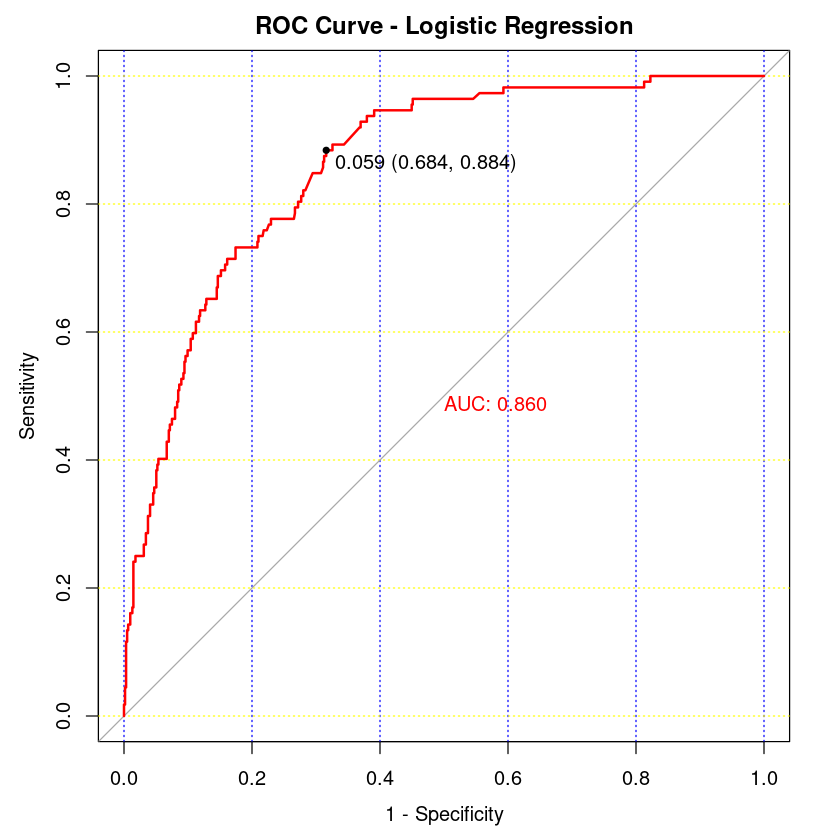

In [10]:
# ROC Curve
library(pROC)
roc_obj <- roc(test_data[, ncol(test_data)], predictions)

plot(
  roc_obj,
  col = "red", 
  main = "ROC Curve - Logistic Regression",
  legacy.axes = T, # y轴格式更改
  print.auc = TRUE, # 显示AUC面积
  print.thres = TRUE, # 添加截点和95%CI
  grid=c(0.2,0.2),
  grid.col=c("blue","yellow")
)